# Intro

In [2]:
#Code and data can be download from here: https://github.com/PacktPublishing/Pandas-Cookbook/tree/master/data

In [1]:
#%config IPCompleter.greedy=True
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [5]:
movie = pd.read_csv('data/movie.csv')

# Data exploration

In [6]:
movie.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [132]:
movie.shape

(4916, 33)

In [133]:
movie.size

162228

In [134]:
# Get non-missing values for each column
movie.count()

color                         4897
director_name                 4814
num_critic_for_reviews        4867
duration                      4901
director_facebook_likes       4814
actor_3_facebook_likes        4893
actor_2_name                  4903
actor_1_facebook_likes        4909
gross                         4054
profit                        3789
genres                        4916
actor_1_name                  4909
movie_title                   4916
num_voted_users               4916
cast_total_facebook_likes     4916
actor_3_name                  4893
facenumber_in_poster          4903
plot_keywords                 4764
movie_imdb_link               4916
num_user_for_reviews          4895
language                      4904
country                       4911
content_rating                4616
budget                        4432
title_year                    4810
actor_2_facebook_likes        4903
imdb_score                    4916
aspect_ratio                  4590
movie_facebook_likes

In [137]:
# Get missing values for each column
movie.isnull().sum()

color                           19
director_name                  102
num_critic_for_reviews          49
duration                        15
director_facebook_likes        102
actor_3_facebook_likes          23
actor_2_name                    13
actor_1_facebook_likes           7
gross                          862
profit                        1127
genres                           0
actor_1_name                     7
movie_title                      0
num_voted_users                  0
cast_total_facebook_likes        0
actor_3_name                    23
facenumber_in_poster            13
plot_keywords                  152
movie_imdb_link                  0
num_user_for_reviews            21
language                        12
country                          5
content_rating                 300
budget                         484
title_year                     106
actor_2_facebook_likes          13
imdb_score                       0
aspect_ratio                   326
movie_facebook_likes

In [135]:
movie.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,profit,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,has_seen,actor_total_facebook_likes,pct_actor_cast_like
count,4867.000000,4901.000000,4814.000000,4893.000000,4909.000000,4.054000e+03,3.789000e+03,4.916000e+03,4916.000000,4903.000000,4895.000000,4.432000e+03,4810.000000,4903.000000,4916.000000,4590.000000,4916.000000,4916.0,4916.000000,4883.000000
mean,137.988905,107.090798,691.014541,631.276313,6494.488491,4.764451e+07,8.693209e+03,8.264492e+04,9579.815907,1.377320,267.668846,3.654749e+07,2002.447609,1621.923516,6.437429,2.222349,7348.294142,0.0,8728.037225,0.830821
std,120.239379,25.286015,2832.954125,1625.874802,15106.986884,6.737255e+07,1.139491e+05,1.383222e+05,18164.316990,2.023826,372.934839,1.002427e+08,12.453977,4011.299523,1.127802,1.402940,19206.016458,0.0,17682.483804,0.146257
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,-4.199788e+06,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000,0.0,0.000000,0.000000
25%,49.000000,93.000000,7.000000,132.000000,607.000000,5.019656e+06,-1.019724e+04,8.361750e+03,1394.750000,0.000000,64.000000,6.000000e+06,1999.000000,277.000000,5.800000,1.850000,0.000000,0.0,1122.750000,0.733884
50%,108.000000,103.000000,48.000000,366.000000,982.000000,2.504396e+07,7.517150e+02,3.313250e+04,3049.000000,1.000000,153.000000,1.985000e+07,2005.000000,593.000000,6.600000,2.350000,159.000000,0.0,2145.500000,0.868432
75%,191.000000,118.000000,189.750000,633.000000,11000.000000,6.110841e+07,2.428172e+04,9.377275e+04,13616.750000,2.000000,320.500000,4.300000e+07,2011.000000,912.000000,7.200000,2.350000,2000.000000,0.0,12651.000000,0.954126
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,5.235058e+05,1.689764e+06,656730.000000,43.000000,5060.000000,4.200000e+09,2016.000000,137000.000000,9.500000,16.000000,349000.000000,0.0,655000.000000,1.000000


In [115]:
movie.set_index('movie_title')['gross'].head()

movie_title
Avatar                                        760505847.0
Pirates of the Caribbean: At World's End      309404152.0
Spectre                                       200074175.0
The Dark Knight Rises                         448130642.0
Star Wars: Episode VII - The Force Awakens            NaN
Name: gross, dtype: float64

In [7]:
columns = movie.columns
columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [8]:
type(columns)

pandas.core.indexes.base.Index

In [9]:
issubclass(pd.RangeIndex, pd.Index)

True

In [10]:
# Pandas defaults its core numeric types, integers and floats to 64bit 
# regardless of the size necessary for all data to fit in memory.
# Object is usually strings (catch-all for columns)
movie.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [121]:
movie.get_dtype_counts()

bool        1
float64    16
int64       4
object     12
dtype: int64

In [115]:
movie.set_index('movie_title')['gross'].head()

movie_title
Avatar                                        760505847.0
Pirates of the Caribbean: At World's End      309404152.0
Spectre                                       200074175.0
The Dark Knight Rises                         448130642.0
Star Wars: Episode VII - The Force Awakens            NaN
Name: gross, dtype: float64

In [11]:
# Get a series (a column)
movie['director_name']

0            James Cameron
1           Gore Verbinski
2               Sam Mendes
3        Christopher Nolan
4              Doug Walker
5           Andrew Stanton
6                Sam Raimi
7             Nathan Greno
8              Joss Whedon
9              David Yates
10             Zack Snyder
11            Bryan Singer
12            Marc Forster
13          Gore Verbinski
14          Gore Verbinski
15             Zack Snyder
16          Andrew Adamson
17             Joss Whedon
18            Rob Marshall
19        Barry Sonnenfeld
20           Peter Jackson
21               Marc Webb
22            Ridley Scott
23           Peter Jackson
24             Chris Weitz
25           Peter Jackson
26           James Cameron
27           Anthony Russo
28              Peter Berg
29         Colin Trevorrow
               ...        
4886            Eric Eason
4887              Uwe Boll
4888     Richard Linklater
4889       Joseph Mazzella
4890          Travis Legge
4891         Alex Kendrick
4

In [12]:
# Turn a series to a dataframe
director = movie['director_name']
director.to_frame()

,director_name
0,James Cameron
1,Gore Verbinski
2,Sam Mendes
3,Christopher Nolan
4,Doug Walker
5,Andrew Stanton
6,Sam Raimi
7,Nathan Greno
8,Joss Whedon
9,David Yates


In [14]:
director.value_counts()

Steven Spielberg         26
Woody Allen              22
Martin Scorsese          20
Clint Eastwood           20
Spike Lee                16
Ridley Scott             16
Renny Harlin             15
Steven Soderbergh        15
Oliver Stone             14
Tim Burton               14
Joel Schumacher          13
Robert Zemeckis          13
Robert Rodriguez         13
Ron Howard               13
Barry Levinson           13
Brian De Palma           12
Kevin Smith              12
Michael Bay              12
Tony Scott               12
Francis Ford Coppola     11
Rob Reiner               11
Richard Donner           11
Sam Raimi                11
Chris Columbus           11
Richard Linklater        11
Shawn Levy               11
David Fincher            10
Paul W.S. Anderson       10
Stephen Frears           10
Wes Craven               10
                         ..
Dagur Kári                1
Tomm Moore                1
Eric Bugbee               1
Daniel Petrie Jr.         1
Frédéric Forestier  

In [66]:
director.value_counts(normalize=True)

Steven Spielberg         0.005401
Woody Allen              0.004570
Martin Scorsese          0.004155
Clint Eastwood           0.004155
Spike Lee                0.003324
Ridley Scott             0.003324
Renny Harlin             0.003116
Steven Soderbergh        0.003116
Oliver Stone             0.002908
Tim Burton               0.002908
Joel Schumacher          0.002700
Robert Zemeckis          0.002700
Robert Rodriguez         0.002700
Ron Howard               0.002700
Barry Levinson           0.002700
Brian De Palma           0.002493
Kevin Smith              0.002493
Michael Bay              0.002493
Tony Scott               0.002493
Francis Ford Coppola     0.002285
Rob Reiner               0.002285
Richard Donner           0.002285
Sam Raimi                0.002285
Chris Columbus           0.002285
Richard Linklater        0.002285
Shawn Levy               0.002285
David Fincher            0.002077
Paul W.S. Anderson       0.002077
Stephen Frears           0.002077
Wes Craven    

In [13]:
# Number of elements
len(director)

4916

In [16]:
# The number of non-missing values
director.count()

4814

In [15]:
# Basis statistics
actor_1_fb_likes = movie['actor_1_facebook_likes']
actor_1_fb_likes.describe()

count      4909.000000
mean       6494.488491
std       15106.986884
min           0.000000
25%         607.000000
50%         982.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [17]:
director.describe()

count                 4814
unique                2397
top       Steven Spielberg
freq                    26
Name: director_name, dtype: object

In [28]:
actor_1_fb_likes.max()

640000.0

In [32]:
actor_1_fb_likes.min()

0.0

In [31]:
actor_1_fb_likes.median()

982.0

In [24]:
#In statistics and probability quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities, or dividing the observations in a sample in the same way. There is one less quantile than the number of groups created. Thus quartiles are the three cut points that will divide a dataset into four equal-sized groups. Common quantiles have special names: for instance quartile, decile (creating 10 groups: see below for more). The groups created are termed halves, thirds, quarters, etc., though sometimes the terms for the quantile are used for the groups created, rather than for the cut points.
actor_1_fb_likes.quantile(.1)
#quantile(.5) = median
#quantile(0.1) = the point between min and max that has 10% of all values from min to this point

240.0

In [34]:
len(actor_1_fb_likes[actor_1_fb_likes<=actor_1_fb_likes.quantile(.1)])

492

In [35]:
len(actor_1_fb_likes)

4916

In [36]:
len(actor_1_fb_likes[actor_1_fb_likes<=actor_1_fb_likes.quantile(.1)]) / len(actor_1_fb_likes)

0.1000813669650122

In [56]:
len(actor_1_fb_likes[actor_1_fb_likes<=(actor_1_fb_likes.quantile(.2))])

983

In [57]:
len(actor_1_fb_likes[actor_1_fb_likes<=(actor_1_fb_likes.quantile(.2))]) / len(actor_1_fb_likes)

0.1999593165174939

# Empty values

In [59]:
director.isnull().sum()

102

In [60]:
len(director) - director.count()

102

In [67]:
director.hasnans

True

In [75]:
# Percentage of values we are missing
actor_1_fb_likes.isnull().mean()

0.0014239218877135883

In [61]:
actor_1_fb_likes_filled = actor_1_fb_likes.fillna(0)

In [62]:
actor_1_fb_likes_filled.count()

4916

In [63]:
len(actor_1_fb_likes_filled)

4916

In [64]:
actor_1_fb_likes_dropped = actor_1_fb_likes.dropna()

In [65]:
actor_1_fb_likes_dropped.size

4909

# Working with operators

In [68]:
imdb_score = movie['imdb_score']

In [69]:
imdb_score > 7

0        True
1        True
2       False
3        True
4        True
5       False
6       False
7        True
8        True
9        True
10      False
11      False
12      False
13       True
14      False
15       True
16      False
17       True
18      False
19      False
20       True
21      False
22      False
23       True
24      False
25       True
26       True
27       True
28      False
29      False
        ...  
4886    False
4887    False
4888     True
4889    False
4890    False
4891    False
4892    False
4893    False
4894    False
4895     True
4896    False
4897    False
4898    False
4899    False
4900     True
4901    False
4902     True
4903    False
4904    False
4905    False
4906    False
4907    False
4908    False
4909     True
4910    False
4911     True
4912     True
4913    False
4914    False
4915    False
Name: imdb_score, Length: 4916, dtype: bool

In [70]:
director == 'James Cameron'

0        True
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26       True
27      False
28      False
29      False
        ...  
4886    False
4887    False
4888    False
4889    False
4890    False
4891    False
4892    False
4893    False
4894    False
4895    False
4896    False
4897    False
4898    False
4899    False
4900    False
4901    False
4902    False
4903    False
4904    False
4905    False
4906    False
4907    False
4908    False
4909    False
4910    False
4911    False
4912    False
4913    False
4914    False
4915    False
Name: director_name, Length: 4916, dtype: bool

# Chaining

In [71]:
director.value_counts().head(3)

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Name: director_name, dtype: int64

In [72]:
actor_1_fb_likes.isnull().sum()

7

In [74]:
actor_1_fb_likes.fillna(0).astype(int).head(10)

0     1000
1    40000
2    11000
3    27000
4      131
5      640
6    24000
7      799
8    26000
9    25000
Name: actor_1_facebook_likes, dtype: int32

# Indexes

In [78]:
movie2 = movie.set_index('movie_title')
movie2

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
Tangled,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
Avengers: Age of Ultron,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000


In [81]:
movie2 = pd.read_csv('data/movie.csv', index_col='movie_title')
movie2

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
Tangled,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
Avengers: Age of Ultron,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000


In [84]:
movie2 = pd.read_csv('data/movie.csv')
movie2.set_index('movie_title')
movie2.reset_index()
movie2

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


# Rename columns and rows

In [85]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
idx_rename = {'Avatar':'Ratava', 'Spectre':'Ertceps'}
col_rename = {'director_name':'Director Name', 'num_critic_for_reviews':'Critical Reviews'}
movie_renamed = movie.rename(index=idx_rename, columns=col_rename)
movie_renamed.head()

,color,Director Name,Critical Reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Ratava,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Ertceps,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Adding and removing columns

In [86]:
movie = pd.read_csv('data/movie.csv')
movie['has_seen'] = 0
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,has_seen
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0


In [87]:
movie['actor_director_facebook_likes'] = \
(movie['actor_1_facebook_likes'] +
movie['actor_2_facebook_likes'] +
movie['actor_3_facebook_likes'] +
movie['director_facebook_likes'])

In [88]:
movie['actor_director_facebook_likes']

0        2791.0
1       46563.0
2       11554.0
3       95000.0
4           NaN
5        2277.0
6       39000.0
7        1651.0
8       66000.0
9       46282.0
10      21000.0
11      28903.0
12       1651.0
13      46563.0
14      43563.0
15      18748.0
16      22497.0
17      66000.0
18      52252.0
19      11722.0
20       6745.0
21      26427.0
22       2511.0
23       6745.0
24      23129.0
25       7003.0
26      43794.0
27      51094.0
28      25159.0
29       6365.0
         ...   
4886      184.0
4887     3288.0
4888        5.0
4889      347.0
4890      830.0
4891      693.0
4892     1565.0
4893      755.0
4894     1221.0
4895      170.0
4896      792.0
4897      675.0
4898      710.0
4899      861.0
4900      402.0
4901       33.0
4902      170.0
4903       58.0
4904     1087.0
4905     1138.0
4906      635.0
4907        0.0
4908      147.0
4909       93.0
4910      634.0
4911     1427.0
4912        NaN
4913        0.0
4914     2154.0
4915      141.0
Name: actor_director_fac

In [89]:
# When numeric columns are added then pandas defaults missing values to zero but if all values for a particular row are missing 
# then pandas keeps the total as missing as well
movie['actor_director_facebook_likes'].isnull().sum()

122

In [90]:
movie['actor_director_facebook_likes'] = movie['actor_director_facebook_likes'].fillna(0)

In [91]:
movie['is_cast_likes_more'] = (movie['cast_total_facebook_likes']>=movie['actor_director_facebook_likes'])

In [92]:
# Check if all values of this column are true
movie['is_cast_likes_more'].all()

False

In [93]:
movie = movie.drop('actor_director_facebook_likes', axis='columns')

In [95]:
movie['actor_total_facebook_likes'] = \
(movie['actor_1_facebook_likes'] +
movie['actor_2_facebook_likes'] +
movie['actor_3_facebook_likes'])

In [96]:
movie['actor_total_facebook_likes'] = movie['actor_total_facebook_likes'].fillna(0)

In [97]:
movie['is_cast_likes_more'] = (movie['cast_total_facebook_likes']>=movie['actor_total_facebook_likes'])

In [98]:
# Check if all values of this column are true
movie['is_cast_likes_more'].all()

True

In [101]:
movie['pct_actor_cast_like'] = \
movie['actor_total_facebook_likes'] / movie['cast_total_facebook_likes']

In [105]:
movie.set_index('movie_title')['pct_actor_cast_like'].head()

movie_title
Avatar                                        0.577369
Pirates of the Caribbean: At World's End      0.951396
Spectre                                       0.987521
The Dark Knight Rises                         0.683783
Star Wars: Episode VII - The Force Awakens    0.000000
Name: pct_actor_cast_like, dtype: float64

In [107]:
profit_index = movie.columns.get_loc('gross')+1
profit_index

9

In [113]:
del movie['profit']
movie.insert(loc=profit_index, column='profit', value=(movie['gross']-movie['budget'])/1000)

In [114]:
movie.set_index('movie_title')['profit'].head()

movie_title
Avatar                                        523505.847
Pirates of the Caribbean: At World's End        9404.152
Spectre                                       -44925.825
The Dark Knight Rises                         198130.642
Star Wars: Episode VII - The Force Awakens           NaN
Name: profit, dtype: float64

# Selecting multiple dataframe columns

In [116]:
movie_actor_director = movie[['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name']]

In [117]:
movie_actor_director.head()

,actor_1_name,actor_2_name,actor_3_name,director_name
0,CCH Pounder,Joel David Moore,Wes Studi,James Cameron
1,Johnny Depp,Orlando Bloom,Jack Davenport,Gore Verbinski
2,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Sam Mendes
3,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Christopher Nolan
4,Doug Walker,Rob Walker,NaN,Doug Walker


In [119]:
# This selects a column as a series
movie['director_name'].head()

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4          Doug Walker
Name: director_name, dtype: object

In [120]:
# This selects a column as a dataframe
movie[['director_name']].head()

,director_name
0,James Cameron
1,Gore Verbinski
2,Sam Mendes
3,Christopher Nolan
4,Doug Walker


In [131]:
movie.set_index('movie_title').select_dtypes(include=['int64']).head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes,has_seen
movie_title,,,,
Avatar,886204,4834,33000,0
Pirates of the Caribbean: At World's End,471220,48350,0,0
Spectre,275868,11700,85000,0
The Dark Knight Rises,1144337,106759,164000,0
Star Wars: Episode VII - The Force Awakens,8,143,0,0


In [125]:
movie.set_index('movie_title').select_dtypes(include=['number']).head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,profit,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,has_seen,actor_total_facebook_likes,pct_actor_cast_like
movie_title,,,,,,,,,,,,,,,,,,,,
Avatar,723.0,178.0,0.0,855.0,1000.0,760505847.0,523505.847,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,0,2791.0,0.577369
Pirates of the Caribbean: At World's End,302.0,169.0,563.0,1000.0,40000.0,309404152.0,9404.152,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,0,46000.0,0.951396
Spectre,602.0,148.0,0.0,161.0,11000.0,200074175.0,-44925.825,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,0,11554.0,0.987521
The Dark Knight Rises,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,198130.642,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,73000.0,0.683783
Star Wars: Episode VII - The Force Awakens,NaN,NaN,131.0,NaN,131.0,NaN,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0,0,0.0,0.000000


In [126]:
movie.set_index('movie_title').filter(like='facebook').head()

,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,actor_2_facebook_likes,movie_facebook_likes,actor_total_facebook_likes
movie_title,,,,,,,
Avatar,0.0,855.0,1000.0,4834,936.0,33000,2791.0
Pirates of the Caribbean: At World's End,563.0,1000.0,40000.0,48350,5000.0,0,46000.0
Spectre,0.0,161.0,11000.0,11700,393.0,85000,11554.0
The Dark Knight Rises,22000.0,23000.0,27000.0,106759,23000.0,164000,73000.0
Star Wars: Episode VII - The Force Awakens,131.0,NaN,131.0,143,12.0,0,0.0


In [127]:
# Get columns with at least one digit
movie.filter(regex='\d').head()

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
0,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
1,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
2,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
3,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
4,NaN,Rob Walker,131.0,Doug Walker,NaN,12.0


In [128]:
# This is like the index operator but an error is not raised if a column does not exist
movie.filter(items=['actor_1_name', 'asdf'])

,actor_1_name
0,CCH Pounder
1,Johnny Depp
2,Christoph Waltz
3,Tom Hardy
4,Doug Walker
5,Daryl Sabara
6,J.K. Simmons
7,Brad Garrett
8,Chris Hemsworth
9,Alan Rickman


# Operators on data frames and changing axis

In [139]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college_ugds_ = college.filter(like='UGDS_')

In [140]:
college_ugds_ == .0019

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,False,False,False,True,False,True,False,False,False
University of Alabama at Birmingham,False,False,False,False,False,False,False,False,False
Amridge University,False,False,False,False,False,False,False,False,False
University of Alabama in Huntsville,False,False,False,False,False,False,False,False,False
Alabama State University,False,False,False,True,False,False,False,False,False
The University of Alabama,False,False,False,False,False,False,False,False,False
Central Alabama Community College,False,False,False,False,False,False,False,False,True
Athens State University,False,False,False,False,False,False,False,False,False
Auburn University at Montgomery,False,False,False,False,False,False,False,False,False


In [141]:
college_ugds_.count()

UGDS_WHITE    6874
UGDS_BLACK    6874
UGDS_HISP     6874
UGDS_ASIAN    6874
UGDS_AIAN     6874
UGDS_NHPI     6874
UGDS_2MOR     6874
UGDS_NRA      6874
UGDS_UNKN     6874
dtype: int64

In [142]:
college_ugds_.count(axis='columns').head()

INSTNM
Alabama A & M University               9
University of Alabama at Birmingham    9
Amridge University                     9
University of Alabama in Huntsville    9
Alabama State University               9
dtype: int64

In [143]:
college_ugds_.sum(axis='columns').head()

INSTNM
Alabama A & M University               1.0000
University of Alabama at Birmingham    0.9999
Amridge University                     1.0000
University of Alabama in Huntsville    1.0000
Alabama State University               1.0000
dtype: float64

In [144]:
college_ugds_.median(axis='index')

UGDS_WHITE    0.55570
UGDS_BLACK    0.10005
UGDS_HISP     0.07140
UGDS_ASIAN    0.01290
UGDS_AIAN     0.00260
UGDS_NHPI     0.00000
UGDS_2MOR     0.01750
UGDS_NRA      0.00000
UGDS_UNKN     0.01430
dtype: float64

In [145]:
college_ugds__cumsum = college_ugds_.cumsum(axis=1)
college_ugds__cumsum.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9686,0.9741,0.9760,0.9784,0.9803,0.9803,0.9862,1.0000
University of Alabama at Birmingham,0.5922,0.8522,0.8805,0.9323,0.9345,0.9352,0.9720,0.9899,0.9999
Amridge University,0.2990,0.7182,0.7251,0.7285,0.7285,0.7285,0.7285,0.7285,1.0000
University of Alabama in Huntsville,0.6988,0.8243,0.8625,0.9001,0.9144,0.9146,0.9318,0.9650,1.0000
Alabama State University,0.0158,0.9366,0.9487,0.9506,0.9516,0.9522,0.9620,0.9863,1.0000


# Example - Work on college diversity

In [146]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college_ugds_ = college.filter(like='UGDS_')

In [147]:
college_ugds_.isnull()\
.sum(axis=1)\
.sort_values(ascending=False)\
.head()

INSTNM
Excel Learning Center-San Antonio South         9
Philadelphia College of Osteopathic Medicine    9
Assemblies of God Theological Seminary          9
Episcopal Divinity School                       9
Phillips Graduate Institute                     9
dtype: int64

In [151]:
college_ugds_ = college_ugds_.dropna(how='all')

In [154]:
college_ugds_.isnull().sum()

UGDS_WHITE    0
UGDS_BLACK    0
UGDS_HISP     0
UGDS_ASIAN    0
UGDS_AIAN     0
UGDS_NHPI     0
UGDS_2MOR     0
UGDS_NRA      0
UGDS_UNKN     0
dtype: int64

In [159]:
# ge = Greater than or equal
college_ugds_.ge(.15)

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,False,True,False,False,False,False,False,False,False
University of Alabama at Birmingham,True,True,False,False,False,False,False,False,False
Amridge University,True,True,False,False,False,False,False,False,True
University of Alabama in Huntsville,True,False,False,False,False,False,False,False,False
Alabama State University,False,True,False,False,False,False,False,False,False
The University of Alabama,True,False,False,False,False,False,False,False,False
Central Alabama Community College,True,True,False,False,False,False,False,False,False
Athens State University,True,False,False,False,False,False,False,False,False
Auburn University at Montgomery,True,True,False,False,False,False,False,False,False


In [160]:
# How many races have more than 15
diversity_metric = college_ugds_.ge(.15).sum(axis='columns')
diversity_metric.head()

INSTNM
Alabama A & M University               1
University of Alabama at Birmingham    2
Amridge University                     3
University of Alabama in Huntsville    1
Alabama State University               1
dtype: int64

In [163]:
diversity_metric.value_counts().sort_index()

0       7
1    3042
2    2884
3     876
4      63
5       2
dtype: int64

In [164]:
diversity_metric.sort_values(ascending=False).head()

INSTNM
Regency Beauty Institute-Austin          5
Central Texas Beauty College-Temple      5
Sullivan and Cogliano Training Center    4
Ambria College of Nursing                4
Berkeley College-New York                4
dtype: int64

In [165]:
college_ugds_.loc[['Regency Beauty Institute-Austin','Central Texas Beauty College-Temple']]

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Regency Beauty Institute-Austin,0.1867,0.2133,0.1600,0.0000,0.0,0.0,0.1733,0.0,0.2667
Central Texas Beauty College-Temple,0.1616,0.2323,0.2626,0.0202,0.0,0.0,0.1717,0.0,0.1515


In [166]:
us_news_top = ['Rutgers University-Newark',
               'Andrews University',
               'Stanford University',
               'University of Houston',
               'University of Nevada-Las Vegas']
diversity_metric.loc[us_news_top]

INSTNM
Rutgers University-Newark         4
Andrews University                3
Stanford University               3
University of Houston             3
University of Nevada-Las Vegas    3
dtype: int64

In [167]:
(college_ugds > .01).all(axis=1).any()

True

# Exploratory Data Analysis (EDA)

In [172]:
import numpy as np

In [168]:
college = pd.read_csv('data/college.csv')
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [169]:
college.shape

(7535, 27)

In [170]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7535 entries, 0 to 7534
Data columns (total 27 columns):
INSTNM                7535 non-null object
CITY                  7535 non-null object
STABBR                7535 non-null object
HBCU                  7164 non-null float64
MENONLY               7164 non-null float64
WOMENONLY             7164 non-null float64
RELAFFIL              7535 non-null int64
SATVRMID              1185 non-null float64
SATMTMID              1196 non-null float64
DISTANCEONLY          7164 non-null float64
UGDS                  6874 non-null float64
UGDS_WHITE            6874 non-null float64
UGDS_BLACK            6874 non-null float64
UGDS_HISP             6874 non-null float64
UGDS_ASIAN            6874 non-null float64
UGDS_AIAN             6874 non-null float64
UGDS_NHPI             6874 non-null float64
UGDS_2MOR             6874 non-null float64
UGDS_NRA              6874 non-null float64
UGDS_UNKN             6874 non-null float64
PPTUG_EF          

In [173]:
college.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.0000
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.0000
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.0000
RELAFFIL,7535.0,0.190975,0.393096,0.0,0.000000,0.00000,0.000000,1.0000
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,765.0000
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,785.0000
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.0000
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,151558.0000
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.0000
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.0000


In [176]:
college.describe(include=[np.object,pd.Categorical]).T

,count,unique,top,freq
INSTNM,7535,7535,Josef's School of Hair Design Inc-Fargo Downtown,1
CITY,7535,2514,New York,87
STABBR,7535,59,CA,773
MD_EARN_WNE_P10,6413,598,PrivacySuppressed,822
GRAD_DEBT_MDN_SUPP,7503,2038,PrivacySuppressed,1510


# Memory usage

In [7]:
college = pd.read_csv('data/college.csv')
different_cols = ['RELAFFIL','SATMTMID','CURROPER','INSTNM','STABBR']
col2 = college.loc[:, different_cols]
col2.head()

,RELAFFIL,SATMTMID,CURROPER,INSTNM,STABBR
0,0,420.0,1,Alabama A & M University,AL
1,0,565.0,1,University of Alabama at Birmingham,AL
2,1,NaN,1,Amridge University,AL
3,0,590.0,1,University of Alabama in Huntsville,AL
4,0,430.0,1,Alabama State University,AL


In [8]:
col2.dtypes

RELAFFIL      int64
SATMTMID    float64
CURROPER      int64
INSTNM       object
STABBR       object
dtype: object

In [9]:
original_mem = col2.memory_usage(deep=True)
original_mem

Index           80
RELAFFIL     60280
SATMTMID     60280
CURROPER     60280
INSTNM      660240
STABBR      444565
dtype: int64

In [11]:
col2['RELAFFIL'] = col2['RELAFFIL'].astype(np.int8)

In [12]:
col2.dtypes

RELAFFIL       int8
SATMTMID    float64
CURROPER      int64
INSTNM       object
STABBR       object
dtype: object

In [13]:
col2.memory_usage(deep=True)

Index           80
RELAFFIL      7535
SATMTMID     60280
CURROPER     60280
INSTNM      660240
STABBR      444565
dtype: int64

In [14]:
college[different_cols].memory_usage(deep=True)

Index           80
RELAFFIL     60280
SATMTMID     60280
CURROPER     60280
INSTNM      660240
STABBR      444565
dtype: int64

In [15]:
# If a column has low cardinality it's beneficial to convert it to categorical
col2.select_dtypes(include=['object']).nunique()
# Column STABBR is a good candidate for categorical

INSTNM    7535
STABBR      59
dtype: int64

In [16]:
col2['STABBR'] = col2['STABBR'].astype('category')
col2.dtypes

RELAFFIL        int8
SATMTMID     float64
CURROPER       int64
INSTNM        object
STABBR      category
dtype: object

In [17]:
new_mem = col2.memory_usage(deep=True)
new_mem

Index           80
RELAFFIL      7535
SATMTMID     60280
CURROPER     60280
INSTNM      660699
STABBR       13576
dtype: int64

In [18]:
new_mem/original_mem

Index       1.000000
RELAFFIL    0.125000
SATMTMID    1.000000
CURROPER    1.000000
INSTNM      1.000695
STABBR      0.030538
dtype: float64

# Selecting the smallest and largest

In [20]:
movie = pd.read_csv('data/movie.csv')
movie2 = movie[['movie_title','imdb_score','budget']]
movie2.head()

,movie_title,imdb_score,budget
0,Avatar,7.9,237000000.0
1,Pirates of the Caribbean: At World's End,7.1,300000000.0
2,Spectre,6.8,245000000.0
3,The Dark Knight Rises,8.5,250000000.0
4,Star Wars: Episode VII - The Force Awakens,7.1,NaN


In [36]:
# The 100 movies with the largest imdb score
movie2.nlargest(100, 'imdb_score').head()

,movie_title,imdb_score,budget
2725,Towering Inferno,9.5,NaN
1920,The Shawshank Redemption,9.3,25000000.0
3402,The Godfather,9.2,6000000.0
2779,Dekalog,9.1,NaN
4312,Kickboxer: Vengeance,9.1,17000000.0


In [22]:
# From the 100 movies with the largest imdb score get the top 5 with the lower budget
movie2.nlargest(100, 'imdb_score').nsmallest(5, 'budget')

,movie_title,imdb_score,budget
4804,Butterfly Girl,8.7,180000.0
4801,Children of Heaven,8.5,180000.0
4706,12 Angry Men,8.9,350000.0
4550,A Separation,8.4,500000.0
4636,The Other Dream Team,8.4,500000.0


In [25]:
# Find the highest rated film of each year
movie = pd.read_csv('data/movie.csv')
movie2 = movie[['movie_title','imdb_score','title_year']]
movie2.sort_values('title_year', ascending=False).head()

,movie_title,imdb_score,title_year
3884,The Veil,4.7,2016.0
2375,My Big Fat Greek Wedding 2,6.1,2016.0
2794,Miracles from Heaven,6.8,2016.0
92,Independence Day: Resurgence,5.5,2016.0
153,Kung Fu Panda 3,7.2,2016.0


In [27]:
movie3 = movie2.sort_values(['title_year','imdb_score'], ascending=False)
movie3.head()

,movie_title,imdb_score,title_year
4312,Kickboxer: Vengeance,9.1,2016.0
4277,A Beginner's Guide to Snuff,8.7,2016.0
3798,Airlift,8.5,2016.0
27,Captain America: Civil War,8.2,2016.0
98,Godzilla Resurgence,8.2,2016.0


In [28]:
movie_top_year = movie3.drop_duplicates(subset='title_year')
movie_top_year.head()

,movie_title,imdb_score,title_year
4312,Kickboxer: Vengeance,9.1,2016.0
3745,Running Forever,8.6,2015.0
4369,Queen of the Mountains,8.7,2014.0
3935,"Batman: The Dark Knight Returns, Part 2",8.4,2013.0
3,The Dark Knight Rises,8.5,2012.0


In [29]:
# Sort some columns ascending and some descending
movie4 = movie[['movie_title','title_year','content_rating','budget']]
movie4_sorted = movie4.sort_values(['title_year','content_rating','budget'], ascending=[False,False,True])
movie4_sorted.drop_duplicates(subset=['title_year','content_rating']).head(10)

,movie_title,title_year,content_rating,budget
4026,Compadres,2016.0,R,3000000.0
4658,Fight to the Finish,2016.0,PG-13,150000.0
4661,Rodeo Girl,2016.0,PG,500000.0
3252,The Wailing,2016.0,Not Rated,NaN
4659,Alleluia! The Devil's Carnival,2016.0,NaN,500000.0
4731,Bizarre,2015.0,Unrated,500000.0
812,The Ridiculous 6,2015.0,TV-14,NaN
4831,The Gallows,2015.0,R,100000.0
4825,Romantic Schemer,2015.0,PG-13,125000.0
3796,R.L. Stine's Monsterville: The Cabinet of Souls,2015.0,PG,4400000.0


In [33]:
# Another way to get the top 100 movies and then select those with the lowest budget
movie = pd.read_csv('data/movie.csv')
movie2 = movie[['movie_title','imdb_score','budget']]
movie2.sort_values('imdb_score', ascending=False).head(100).sort_values('budget',ascending=True).head(5)
# The results are different because the ties are solved differently in nlargest and head

,movie_title,imdb_score,budget
4815,A Charlie Brown Christmas,8.4,150000.0
4801,Children of Heaven,8.5,180000.0
4804,Butterfly Girl,8.7,180000.0
4706,12 Angry Men,8.9,350000.0
4636,The Other Dream Team,8.4,500000.0


# Calculating a trailing stop order price

In [3]:
import pandas as pd
import pandas_datareader as pdr

In [6]:
tsla = pdr.DataReader('tsla', data_source='yahoo', start='2017-1-1')
tsla.head(8)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,220.330002,210.960007,214.860001,216.990005,5923300,216.990005
2017-01-04,228.000000,214.309998,214.750000,226.990005,11213500,226.990005
2017-01-05,227.479996,221.949997,226.419998,226.750000,5911700,226.750000
2017-01-06,230.309998,225.449997,226.929993,229.009995,5527900,229.009995
2017-01-09,231.919998,228.000000,228.970001,231.279999,3957000,231.279999
2017-01-10,232.000000,226.889999,232.000000,229.869995,3660000,229.869995
2017-01-11,229.979996,226.679993,229.070007,229.729996,3650800,229.729996
2017-01-12,230.699997,225.580002,229.059998,229.589996,3790200,229.589996


In [8]:
tsla_close = tsla['Close']

In [9]:
tsla_cummax = tsla_close.cummax()
tsla_cummax.head(8)

Date
2017-01-03    216.990005
2017-01-04    226.990005
2017-01-05    226.990005
2017-01-06    229.009995
2017-01-09    231.279999
2017-01-10    231.279999
2017-01-11    231.279999
2017-01-12    231.279999
Name: Close, dtype: float64

In [10]:
tsla_trailing_stop = tsla_cummax * .9
tsla_trailing_stop.head(8)

Date
2017-01-03    195.291005
2017-01-04    204.291005
2017-01-05    204.291005
2017-01-06    206.108995
2017-01-09    208.151999
2017-01-10    208.151999
2017-01-11    208.151999
2017-01-12    208.151999
Name: Close, dtype: float64

# Selecting subsets of data

In [2]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
city = college['CITY']
city.head()

INSTNM
Alabama A & M University                   Normal
University of Alabama at Birmingham    Birmingham
Amridge University                     Montgomery
University of Alabama in Huntsville    Huntsville
Alabama State University               Montgomery
Name: CITY, dtype: object

In [3]:
city.iloc[3] # returns scalar

'Huntsville'

In [14]:
city.iloc[[3]] # returns series

INSTNM
University of Alabama in Huntsville    Huntsville
Name: CITY, dtype: object

In [4]:
city.iloc[[10,20,30]]

INSTNM
Birmingham Southern College                            Birmingham
George C Wallace State Community College-Hanceville    Hanceville
Judson College                                             Marion
Name: CITY, dtype: object

In [5]:
city.iloc[4:50:10]

INSTNM
Alabama State University              Montgomery
Enterprise State Community College    Enterprise
Heritage Christian University           Florence
Marion Military Institute                 Marion
Reid State Technical College           Evergreen
Name: CITY, dtype: object

In [8]:
city.loc['Heritage Christian University']

'Florence'

In [11]:
np.random.seed(1)
labels = list(np.random.choice(city.index,4))
labels

['Northwest HVAC/R Training Center',
 'California State University-Dominguez Hills',
 'Lower Columbia College',
 'Southwest Acupuncture College-Boulder']

In [13]:
city.loc['Alabama State University':'Reid State Technical College':10] #Take 1 out of 10

INSTNM
Alabama State University              Montgomery
Enterprise State Community College    Enterprise
Heritage Christian University           Florence
Marion Military Institute                 Marion
Reid State Technical College           Evergreen
Name: CITY, dtype: object

In [15]:
college.iloc[60] #selects a row

CITY                  Anchorage
STABBR                       AK
HBCU                          0
MENONLY                       0
WOMENONLY                     0
RELAFFIL                      0
SATVRMID                    NaN
SATMTMID                    NaN
DISTANCEONLY                  0
UGDS                      12865
UGDS_WHITE               0.5747
UGDS_BLACK               0.0358
UGDS_HISP                0.0761
UGDS_ASIAN               0.0778
UGDS_AIAN                0.0653
UGDS_NHPI                0.0086
UGDS_2MOR                 0.098
UGDS_NRA                 0.0181
UGDS_UNKN                0.0457
PPTUG_EF                 0.4539
CURROPER                      1
PCTPELL                  0.2385
PCTFLOAN                 0.2647
UG25ABV                  0.4386
MD_EARN_WNE_P10           42500
GRAD_DEBT_MDN_SUPP      19449.5
Name: University of Alaska Anchorage, dtype: object

In [16]:
college.loc['University of Alaska Anchorage']

CITY                  Anchorage
STABBR                       AK
HBCU                          0
MENONLY                       0
WOMENONLY                     0
RELAFFIL                      0
SATVRMID                    NaN
SATMTMID                    NaN
DISTANCEONLY                  0
UGDS                      12865
UGDS_WHITE               0.5747
UGDS_BLACK               0.0358
UGDS_HISP                0.0761
UGDS_ASIAN               0.0778
UGDS_AIAN                0.0653
UGDS_NHPI                0.0086
UGDS_2MOR                 0.098
UGDS_NRA                 0.0181
UGDS_UNKN                0.0457
PPTUG_EF                 0.4539
CURROPER                      1
PCTPELL                  0.2385
PCTFLOAN                 0.2647
UG25ABV                  0.4386
MD_EARN_WNE_P10           42500
GRAD_DEBT_MDN_SUPP      19449.5
Name: University of Alaska Anchorage, dtype: object

In [17]:
college.iloc[[60,99,3]]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
University of Alaska Anchorage,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,12865.0,...,0.0980,0.0181,0.0457,0.4539,1,0.2385,0.2647,0.4386,42500,19449.5
International Academy of Hair Design,Tempe,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,188.0,...,0.0160,0.0000,0.0638,0.0000,0,0.7185,0.7346,0.3905,22200,10556
University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097


In [18]:
college.loc[['University of Alaska Anchorage','International Academy of Hair Design','University of Alabama in Huntsville']]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
University of Alaska Anchorage,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,12865.0,...,0.0980,0.0181,0.0457,0.4539,1,0.2385,0.2647,0.4386,42500,19449.5
International Academy of Hair Design,Tempe,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,188.0,...,0.0160,0.0000,0.0638,0.0000,0,0.7185,0.7346,0.3905,22200,10556
University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097


In [19]:
college.iloc[99:102]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
International Academy of Hair Design,Tempe,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,188.0,...,0.0160,0.0000,0.0638,0.0000,0,0.7185,0.7346,0.3905,22200,10556
GateWay Community College,Phoenix,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,5211.0,...,0.0127,0.0161,0.0702,0.7465,1,0.3270,0.2189,0.5832,29800,7283
Mesa Community College,Mesa,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,19055.0,...,0.0205,0.0257,0.0682,0.6457,1,0.3423,0.2207,0.4010,35200,8000


In [24]:
college.iloc[[60,99,3]].index.tolist()

['University of Alaska Anchorage',
 'International Academy of Hair Design',
 'University of Alabama in Huntsville']

In [25]:
college.iloc[:3, :4]

,CITY,STABBR,HBCU,MENONLY
INSTNM,,,,
Alabama A & M University,Normal,AL,1.0,0.0
University of Alabama at Birmingham,Birmingham,AL,0.0,0.0
Amridge University,Montgomery,AL,0.0,0.0


In [26]:
college.loc[:'Amridge University', :'MENONLY']

,CITY,STABBR,HBCU,MENONLY
INSTNM,,,,
Alabama A & M University,Normal,AL,1.0,0.0
University of Alabama at Birmingham,Birmingham,AL,0.0,0.0
Amridge University,Montgomery,AL,0.0,0.0


In [27]:
college.iloc[:, [4,6]].head()

,WOMENONLY,SATVRMID
INSTNM,,
Alabama A & M University,0.0,424.0
University of Alabama at Birmingham,0.0,570.0
Amridge University,0.0,NaN
University of Alabama in Huntsville,0.0,595.0
Alabama State University,0.0,425.0


In [28]:
college.loc[:, ['WOMENONLY','SATVRMID']].head()

,WOMENONLY,SATVRMID
INSTNM,,
Alabama A & M University,0.0,424.0
University of Alabama at Birmingham,0.0,570.0
Amridge University,0.0,NaN
University of Alabama in Huntsville,0.0,595.0
Alabama State University,0.0,425.0


In [29]:
college.iloc[[100,200],[7,15]]

,SATMTMID,UGDS_NHPI
INSTNM,,
GateWay Community College,NaN,0.0029
American Baptist Seminary of the West,NaN,NaN


In [30]:
college.loc['The University of Alabama','PCTFLOAN']

0.401

In [31]:
col_start = college.columns.get_loc('UGDS_WHITE')
col_end = college.columns.get_loc('UGDS_UNKN') + 1
col_start, col_end

(10, 19)

In [32]:
college.iloc[:5, col_start:col_end]

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


# Boolean indexing

In [3]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
movie_2_hours = movie['duration'] > 120
movie_2_hours.head(10)

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

In [5]:
movie_2_hours.sum()

1039

In [7]:
#this is misleading because there are some missing values
movie_2_hours.mean()

0.2113506916192026

In [8]:
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [9]:
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

In [10]:
criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = (movie.title_year<2000) | (movie.title_year>2009)

In [11]:
criteria3.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: title_year, dtype: bool

In [12]:
criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [13]:
movie[criteria_final].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [14]:
cols = ['imdb_score', 'content_rating', 'title_year']
movie_filtered = movie.loc[criteria_final, cols]
movie_filtered.head(10)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Jurassic Park,8.1,PG-13,1993.0
Forrest Gump,8.8,PG-13,1994.0


In [15]:
college = pd.read_csv('data/college.csv')
college[college['STABBR']=='TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [16]:
college2 = college.set_index('STABBR')
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [17]:
%timeit college[college['STABBR']=='TX']

1.86 ms ± 130 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%timeit college2.loc['TX']

903 µs ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
%timeit college2 = college.set_index('STABBR')

3.2 ms ± 242 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
states = ['TX','CA','NY']
college[college['STABBR'].isin(states)]

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
192,Academy of Art University,San Francisco,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0249,0.2523,0.2098,0.4334,1,0.4008,0.5524,0.4043,36000,35093
193,ITT Technical Institute-Rancho Cordova,Rancho Cordova,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0400,0.0000,0.1780,0.2540,0,0.7137,0.7667,0.7235,38800,25827.5
194,Academy of Chinese Culture and Health Sciences,Oakland,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
195,The Academy of Radio and TV Broadcasting,Huntington Beach,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.9579,1.0000,0.4545,28400,9500
196,Avalon School of Cosmetology-Alameda,Alameda,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0553,0.0000,0.0435,0.5099,1,0.7407,0.6768,0.3387,21600,9860
197,College of Alameda,Alameda,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0473,0.0076,0.0500,0.8440,1,0.2273,0.0117,0.3940,31900,PrivacySuppressed
198,Allan Hancock College,Santa Maria,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0312,0.0021,0.0005,0.6630,1,0.2531,0.0231,0.3713,29800,10500
199,American Academy of Dramatic Arts-Los Angeles,Los Angeles,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.1321,0.2429,0.0071,0.0000,1,0.5039,0.6008,0.1589,27800,12000
200,American Baptist Seminary of the West,Berkeley,CA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
201,American Film Institute Conservatory,Los Angeles,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


In [23]:
college = pd.read_csv('data/college.csv')
college2 = college.set_index('STABBR')
college2.index.is_monotonic

False

In [24]:
college3 = college2.sort_index()
college3.index.is_monotonic

True

In [25]:
%timeit college[college['STABBR']=='TX']

1.9 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%timeit college2.loc['TX']

951 µs ± 85.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [27]:
%timeit college3.loc['TX']

258 µs ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [30]:
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

In [32]:
%timeit college[college['INSTNM']=='Stanford University']

1.71 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
%timeit college_unique.loc['Stanford University']

240 µs ± 48 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
#Multiple columns in index
college.index = college['CITY'] + ', ' + college['STABBR']
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Normal, AL",Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
"Birmingham, AL",University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
"Montgomery, AL",Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
"Huntsville, AL",University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
"Montgomery, AL",Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [37]:
college.loc['Miami, FL'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",Barry University,Miami,FL,0.0,0.0,0.0,1,470.0,462.0,0.0,...,0.0164,0.0741,0.0841,0.1518,1,0.5045,0.6733,0.4361,44100,28250
"Miami, FL",Carlos Albizu University-Miami,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0191,0.0305,0.5115,1,0.5850,0.7755,0.6701,29100,25000
"Miami, FL",Florida International University,Miami,FL,0.0,0.0,0.0,0,545.0,535.0,0.0,...,0.0228,0.0521,0.0092,0.3520,1,0.5642,0.4628,0.2698,43700,17250
"Miami, FL",Florida Career College-Miami,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0109,0.0002,0.0132,0.0000,1,0.7490,0.6755,0.6511,30100,9500
"Miami, FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0000,0.0000,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


# Stock prices exercise

In [6]:
slb = pd.read_csv('data/slb_stock.csv', index_col='Date', parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [7]:
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1,.9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [8]:
type(slb_summary)

pandas.core.series.Series

In [9]:
slb_summary.index

Index(['count', 'mean', 'std', 'min', '10%', '50%', '90%', 'max'], dtype='object')

In [10]:
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
upper_10

93.24800000000002

In [11]:
criteria = (slb_close<lower_10) | (slb_close>upper_10)
slb_top_bottom_10=slb_close[criteria]

In [12]:
import matplotlib.pyplot as plt

In [15]:
#First we plot all prices in black
slb_close.plot(color='black', figsize=(12,6))
#Next we plot only the top and bottom 10% in light gray, style=' ' means that we don't want a line. ms=marker size
slb_top_bottom_10.plot(marker='o', style=' ', ms=4, color='lightgray')
xmin = criteria.index[0]
xmax = criteria.index[-1]
#Hlines draws horizontal lines
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax, color='black')

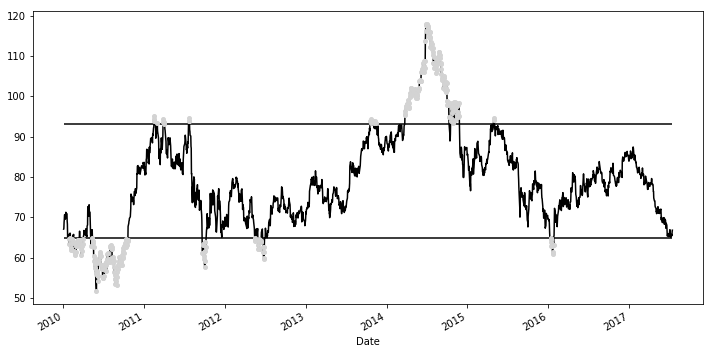

In [16]:
plt.show()

In [35]:
slb_close.plot(color='black', figsize=(12,6))
xmin = criteria.index[0]
xmax = criteria.index[-1]
#Hlines draws horizontal lines
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax, color='lightgray')
plt.fill_between(x=criteria.index,y1=lower_10,y2=slb_close.values,color='black')
plt.fill_between(x=criteria.index,y1=lower_10,y2=slb_close.values,where=slb_close<lower_10,color='lightgray')
plt.fill_between(x=criteria.index,y1=upper_10,y2=slb_close.values,where=slb_close>upper_10,color='lightgray')

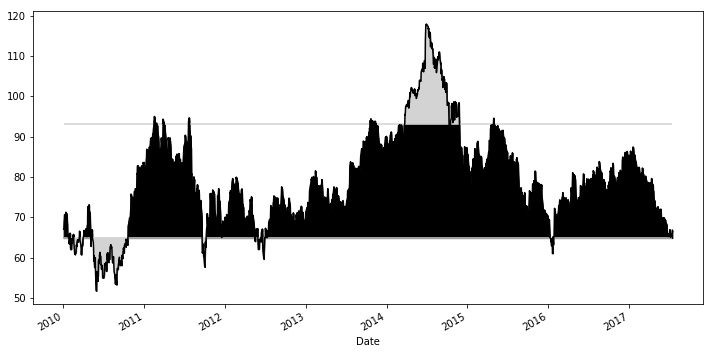

In [36]:
plt.show()

# Convert SQL filter to Pandas

In [38]:
employee = pd.read_csv('data/employee.csv')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [42]:
len(employee)

2000

In [39]:
employee.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [43]:
employee.GENDER.value_counts().head()

Male      1397
Female     603
Name: GENDER, dtype: int64

In [45]:
employee.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int32

In [48]:
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
select_columns = ['UNIQUE_ID','DEPARTMENT','GENDER','BASE_SALARY']
employee.loc[employee.DEPARTMENT.isin(depts) 
             & (employee.GENDER=='Female') 
             & (employee.BASE_SALARY>80000) 
             & (employee.BASE_SALARY<120000), select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [50]:
employee.loc[employee.DEPARTMENT.isin(depts) 
             & (employee.GENDER=='Female') 
             & (employee.BASE_SALARY>80000) 
             & (employee.BASE_SALARY.between(80000,120000)), select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [52]:
# Exclude the rows from the top fice most frequently occuring departments
top_5_depts = employee.DEPARTMENT.value_counts().index[:5]
top_5_depts

Index(['Houston Police Department-HPD', 'Houston Fire Department (HFD)',
       'Public Works & Engineering-PWE', 'Health & Human Services',
       'Houston Airport System (HAS)'],
      dtype='object')

In [53]:
employee[~employee.DEPARTMENT.isin(top_5_depts)]

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
18,18,MAINTENANCE MECHANIC III,General Services Department,40581.0,Hispanic/Latino,Full Time,Male,Active,2008-12-29,2008-12-29
32,32,SENIOR ACCOUNTANT,Finance,46963.0,Black or African American,Full Time,Male,Active,1991-02-11,2016-02-13
37,37,ASSISTANT SHOP MANAGER,Fleet Management Department,51438.0,White,Full Time,Male,Active,1995-11-30,2016-03-12
57,57,SEMI-SKILLED LABORER,Solid Waste Management,27622.0,Black or African American,Full Time,Male,Active,2015-08-31,2015-08-31
71,71,COUNCIL INTERN (EXECUTIVE LEVEL),City Council,NaN,Hispanic/Latino,Part Time 30,Male,Active,2015-06-08,2016-02-13
73,73,ADMINISTRATIVE SPECIALIST,Human Resources Dept.,55939.0,Black or African American,Full Time,Female,Active,2011-12-19,2013-11-23
74,74,SENIOR SIDELOADER OPERATOR,Solid Waste Management,38459.0,Black or African American,Full Time,Male,Active,2004-09-07,2005-07-09


In [54]:
amzn = pd.read_csv('data/amzn_stock.csv', index_col='Date', parse_dates=['Date'])
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [55]:
amzn_daily_return = amzn.Close.pct_change()
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

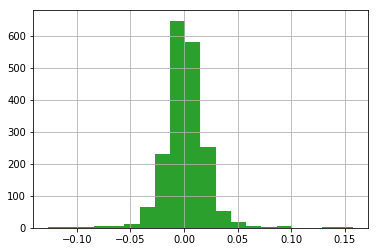

In [60]:
#Drop the missing value
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins=20)
plt.show()

In [65]:
mean = amzn_daily_return.mean()
std = amzn_daily_return.std()

In [67]:
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)
pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
pcts

[0.7873350923482849, 0.9562005277044855, 0.9846965699208443]

In [68]:
print('{:.3f} fall within 1 standard deviation. '
     '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

0.787 fall within 1 standard deviation. 0.956 within 2 and 0.985 within 3


# Where, Clip, Mask

In [72]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

In [73]:
fb_likes = movie['actor_1_facebook_likes'].dropna()
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [74]:
fb_likes.describe(percentiles=[.1, .25, .5, .75, .9]).astype(int)

count      4909
mean       6494
std       15106
min           0
10%         240
25%         607
50%         982
75%       11000
90%       18000
max      640000
Name: actor_1_facebook_likes, dtype: int32

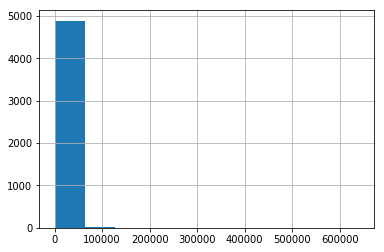

In [75]:
fb_likes.hist()
# Not a very good diagram, let's limit the outliers

In [76]:
criteria_high = fb_likes<20000
criteria_high.mean().round(2)
# About 91% of the movies have an actor 1 with fewer than 20.000 likes

0.91

In [77]:
# Where replaces false locations replaced with a missing value. The resulting series is the same in length.
fb_likes.where(criteria_high).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [78]:
# Let's change all the likes > 20000 to 20000
fb_likes.where(criteria_high, other=20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [79]:
fb_likes.where(criteria_high, other=20000).where(fb_likes>300, other=300).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

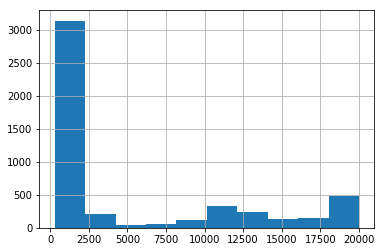

In [80]:
fb_likes.where(criteria_high, other=20000).where(fb_likes>300, other=300).hist()
# This is a better plot

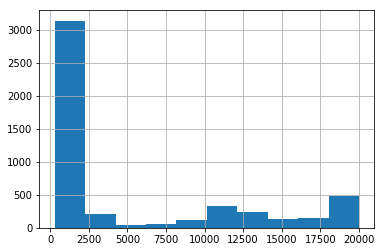

In [81]:
fb_likes_cap = fb_likes.clip(lower=300, upper=20000).hist()

In [82]:
#Convert all values to NaN for the specific criteria
movie.mask(movie['title_year']>=2010).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spectre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Dark Knight Rises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0


# Index alignment

In [83]:
college = pd.read_csv('data/college.csv')
columns = college.columns
columns

Index(['INSTNM', 'CITY', 'STABBR', 'HBCU', 'MENONLY', 'WOMENONLY', 'RELAFFIL',
       'SATVRMID', 'SATMTMID', 'DISTANCEONLY', 'UGDS', 'UGDS_WHITE',
       'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI',
       'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'PPTUG_EF', 'CURROPER', 'PCTPELL',
       'PCTFLOAN', 'UG25ABV', 'MD_EARN_WNE_P10', 'GRAD_DEBT_MDN_SUPP'],
      dtype='object')

In [84]:
# Get the NumPy array
columns.values

array(['INSTNM', 'CITY', 'STABBR', 'HBCU', 'MENONLY', 'WOMENONLY',
       'RELAFFIL', 'SATVRMID', 'SATMTMID', 'DISTANCEONLY', 'UGDS',
       'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN',
       'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'PPTUG_EF',
       'CURROPER', 'PCTPELL', 'PCTFLOAN', 'UG25ABV', 'MD_EARN_WNE_P10',
       'GRAD_DEBT_MDN_SUPP'], dtype=object)

In [85]:
columns[5]

'WOMENONLY'

In [86]:
columns[[1,8,10]]

Index(['CITY', 'SATMTMID', 'UGDS'], dtype='object')

In [87]:
columns[-7:-4]

Index(['PPTUG_EF', 'CURROPER', 'PCTPELL'], dtype='object')

In [88]:
c1 = columns[:4]
c1

Index(['INSTNM', 'CITY', 'STABBR', 'HBCU'], dtype='object')

In [89]:
c2 = columns[2:6]
c2

Index(['STABBR', 'HBCU', 'MENONLY', 'WOMENONLY'], dtype='object')

In [90]:
c1.union(c2)

Index(['CITY', 'HBCU', 'INSTNM', 'MENONLY', 'STABBR', 'WOMENONLY'], dtype='object')

In [93]:
s1 = pd.Series(index=list('aaab'), data=np.arange(4))
s1

a    0
a    1
a    2
b    3
dtype: int32

In [94]:
s2 = pd.Series(index=list('cababb'), data=np.arange(6))
s2

c    0
a    1
b    2
a    3
b    4
b    5
dtype: int32

In [95]:
s1+s2

a    1.0
a    3.0
a    2.0
a    4.0
a    3.0
a    5.0
b    5.0
b    7.0
b    8.0
c    NaN
dtype: float64

In [96]:
# When the indexes are the same then instead of a cartesian product the indexes align
s1 = pd.Series(index=list('aaabb'), data=np.arange(5))
s2 = pd.Series(index=list('aaabb'), data=np.arange(5))
s1+s2

a    0
a    2
a    4
b    6
b    8
dtype: int32

In [97]:
# Must be exactly the same
s1 = pd.Series(index=list('bbaaa'), data=np.arange(5))
s2 = pd.Series(index=list('aaabb'), data=np.arange(5))
s1+s2

a    2
a    3
a    4
a    3
a    4
a    5
a    4
a    5
a    6
b    3
b    4
b    4
b    5
dtype: int32

In [98]:
employee = pd.read_csv('data/employee.csv', index_col='RACE')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
RACE,,,,,,,,,
Hispanic/Latino,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Full Time,Female,Active,2006-06-12,2012-10-13
Hispanic/Latino,1,LIBRARY ASSISTANT,Library,26125.0,Full Time,Female,Active,2000-07-19,2010-09-18
White,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,Full Time,Male,Active,2015-02-03,2015-02-03
White,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,Full Time,Male,Active,1982-02-08,1991-05-25
White,4,ELECTRICIAN,General Services Department,56347.0,Full Time,Male,Active,1989-06-19,1994-10-22


In [99]:
salary1 = employee['BASE_SALARY']
salary2 = employee['BASE_SALARY']
salary1 is salary2

True

In [100]:
salary1 = employee['BASE_SALARY'].copy()
salary2 = employee['BASE_SALARY'].copy()
salary1 is salary2

False

In [101]:
salary1 = salary1.sort_index()
salary1.head()

RACE
American Indian or Alaskan Native    78355.0
American Indian or Alaskan Native    26125.0
American Indian or Alaskan Native    98536.0
American Indian or Alaskan Native        NaN
American Indian or Alaskan Native    55461.0
Name: BASE_SALARY, dtype: float64

In [102]:
salary2.head()

RACE
Hispanic/Latino    121862.0
Hispanic/Latino     26125.0
White               45279.0
White               63166.0
White               56347.0
Name: BASE_SALARY, dtype: float64

In [103]:
salary_add = salary1 + salary2
salary_add.head()

RACE
American Indian or Alaskan Native    138702.0
American Indian or Alaskan Native    156710.0
American Indian or Alaskan Native    176891.0
American Indian or Alaskan Native    159594.0
American Indian or Alaskan Native    127734.0
Name: BASE_SALARY, dtype: float64

In [104]:
salary_add1 = salary1 + salary1
len(salary1), len(salary2), len(salary_add), len(salary_add1)
#salary_add exploded the index from 2.000 entries to more than a million because salary1 and salary2 are not aligned

(2000, 2000, 1175424, 2000)

In [105]:
# How is 1175424 calculated?
index_vc = salary1.index.value_counts(dropna=False)
index_vc

Black or African American            700
White                                665
Hispanic/Latino                      480
Asian/Pacific Islander               107
NaN                                   35
American Indian or Alaskan Native     11
Others                                 2
Name: RACE, dtype: int64

In [106]:
index_vc.pow(2).sum()

1175424

In [109]:
baseball_14 = pd.read_csv('data/baseball14.csv', index_col='playerID')
baseball_15 = pd.read_csv('data/baseball15.csv', index_col='playerID')
baseball_16 = pd.read_csv('data/baseball16.csv', index_col='playerID')
baseball_14.head()

,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,,
altuvjo01,2014,1,HOU,AL,158,660,85,225,47,3,...,59.0,56.0,9.0,36,53.0,7.0,5.0,1.0,5.0,20.0
cartech02,2014,1,HOU,AL,145,507,68,115,21,1,...,88.0,5.0,2.0,56,182.0,6.0,5.0,0.0,4.0,12.0
castrja01,2014,1,HOU,AL,126,465,43,103,21,2,...,56.0,1.0,0.0,34,151.0,1.0,9.0,1.0,3.0,11.0
corpoca01,2014,1,HOU,AL,55,170,22,40,6,0,...,19.0,0.0,0.0,14,37.0,0.0,3.0,1.0,2.0,3.0
dominma01,2014,1,HOU,AL,157,564,51,121,17,0,...,57.0,0.0,1.0,29,125.0,2.0,5.0,2.0,7.0,23.0


In [110]:
baseball_14.index.difference(baseball_15.index)

Index(['corpoca01', 'dominma01', 'fowlede01', 'grossro01', 'guzmaje01',
       'hoeslj01', 'krausma01', 'preslal01', 'singljo02'],
      dtype='object', name='playerID')

In [111]:
hits_14 = baseball_14['H']
hits_15 = baseball_15['H']
hits_16 = baseball_16['H']
hits_14.head()

playerID
altuvjo01    225
cartech02    115
castrja01    103
corpoca01     40
dominma01    121
Name: H, dtype: int64

In [112]:
(hits_14+hits_15).head()

playerID
altuvjo01    425.0
cartech02    193.0
castrja01    174.0
congeha01      NaN
corpoca01      NaN
Name: H, dtype: float64

In [113]:
#Fill missing values which occur when we have data for a player only in one of the two datasets
hits_14.add(hits_15, fill_value=0).head()

playerID
altuvjo01    425.0
cartech02    193.0
castrja01    174.0
congeha01     46.0
corpoca01     40.0
Name: H, dtype: float64

In [115]:
hits_14.add(hits_15, fill_value=0).add(hits_16, fill_value=0).head()

playerID
altuvjo01    641.0
bregmal01     53.0
cartech02    193.0
castrja01    243.0
congeha01     46.0
Name: H, dtype: float64

In [116]:
hits_14.add(hits_15, fill_value=0).add(hits_16, fill_value=0).hasnans

False

In [117]:
# The same with dataframes
df_14 = baseball_14[['G','AB','R','H']]
df_14.head()

,G,AB,R,H
playerID,,,,
altuvjo01,158,660,85,225
cartech02,145,507,68,115
castrja01,126,465,43,103
corpoca01,55,170,22,40
dominma01,157,564,51,121


In [118]:
df_15 = baseball_15[['AB','R','H','HR']]
df_15.head()

,AB,R,H,HR
playerID,,,,
altuvjo01,638,86,200,15
cartech02,391,50,78,24
castrja01,337,38,71,11
congeha01,201,25,46,11
correca01,387,52,108,22


In [119]:
(df_14+df_15).head(10).style.highlight_null('yellow')

,AB,G,H,HR,R
playerID,,,,,
altuvjo01,1298,nan,425,nan,171
cartech02,898,nan,193,nan,118
castrja01,802,nan,174,nan,81
congeha01,nan,nan,nan,nan,nan
corpoca01,nan,nan,nan,nan,nan
correca01,nan,nan,nan,nan,nan
dominma01,nan,nan,nan,nan,nan
fowlede01,nan,nan,nan,nan,nan
gattiev01,nan,nan,nan,nan,nan


In [120]:
df_14.add(df_15, fill_value=0).head(10).style.highlight_null('yellow')
#Some values were null in the initial dataframes

,AB,G,H,HR,R
playerID,,,,,
altuvjo01,1298,158,425,15,171
cartech02,898,145,193,24,118
castrja01,802,126,174,11,81
congeha01,201,nan,46,11,25
corpoca01,170,55,40,nan,22
correca01,387,nan,108,22,52
dominma01,564,157,121,nan,51
fowlede01,434,116,120,nan,61
gattiev01,566,nan,139,27,66


In [153]:
employee = pd.read_csv('data/employee.csv')
dept_sal = employee[['DEPARTMENT','BASE_SALARY']]
dept_sal.head()

,DEPARTMENT,BASE_SALARY
0,Municipal Courts Department,121862.0
1,Library,26125.0
2,Houston Police Department-HPD,45279.0
3,Houston Fire Department (HFD),63166.0
4,General Services Department,56347.0


In [154]:
dept_sal = dept_sal.sort_values(['DEPARTMENT','BASE_SALARY'],ascending=[True,False])
dept_sal.head()

,DEPARTMENT,BASE_SALARY
1494,Admn. & Regulatory Affairs,140416.0
237,Admn. & Regulatory Affairs,130416.0
1679,Admn. & Regulatory Affairs,103776.0
988,Admn. & Regulatory Affairs,72741.0
693,Admn. & Regulatory Affairs,66825.0


In [155]:
#Keep the first row of each department
max_dept_sal = dept_sal.drop_duplicates(subset='DEPARTMENT')
max_dept_sal.head()

,DEPARTMENT,BASE_SALARY
1494,Admn. & Regulatory Affairs,140416.0
149,City Controller's Office,64251.0
236,City Council,100000.0
647,Convention and Entertainment,38397.0
1500,Dept of Neighborhoods (DON),89221.0


In [156]:
max_dept_sal.reset_index()
max_dept_sal.columns

Index(['DEPARTMENT', 'BASE_SALARY'], dtype='object')

In [157]:
max_dept_sal.reset_index()
max_dept_sal = max_dept_sal.set_index('DEPARTMENT')
employee = employee.set_index('DEPARTMENT')
employee['MAX_DEPT_SALARY'] = max_dept_sal['BASE_SALARY']
employee.head()

,UNIQUE_ID,POSITION_TITLE,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,MAX_DEPT_SALARY
DEPARTMENT,,,,,,,,,,
Municipal Courts Department,0,ASSISTANT DIRECTOR (EX LVL),121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,121862.0
Library,1,LIBRARY ASSISTANT,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,107763.0
Houston Police Department-HPD,2,POLICE OFFICER,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,199596.0
Houston Fire Department (HFD),3,ENGINEER/OPERATOR,63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,210588.0
General Services Department,4,ELECTRICIAN,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22,89194.0


In [158]:
employee.query('BASE_SALARY > MAX_DEPT_SALARY')

,UNIQUE_ID,POSITION_TITLE,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,MAX_DEPT_SALARY
DEPARTMENT,,,,,,,,,,


In [159]:
employee[employee['BASE_SALARY'] > employee['MAX_DEPT_SALARY']]

,UNIQUE_ID,POSITION_TITLE,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,MAX_DEPT_SALARY
DEPARTMENT,,,,,,,,,,


In [160]:
# The previous works because the 2nd dataframe max_dept_sal has unique values in department
# Let's see what happens otherwise
np.random.seed(1234)
random_salary = dept_sal.sample(n=10).set_index('DEPARTMENT')
random_salary

,BASE_SALARY
DEPARTMENT,
Public Works & Engineering-PWE,50586.0
Houston Police Department-HPD,66614.0
Houston Police Department-HPD,66614.0
Housing and Community Devp.,78853.0
Houston Police Department-HPD,66614.0
Parks & Recreation,NaN
Public Works & Engineering-PWE,37211.0
Public Works & Engineering-PWE,54683.0
Human Resources Dept.,58474.0


In [ ]:
employee['RANDOM_SALARY'] = random_salary['BASE_SALARY']
#error -> ValueError: cannot reindex from a duplicate axis

In [4]:
# Discover the schools that have the maximum calue for each numeric column
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college.dtypes

CITY                   object
STABBR                 object
HBCU                  float64
MENONLY               float64
WOMENONLY             float64
RELAFFIL                int64
SATVRMID              float64
SATMTMID              float64
DISTANCEONLY          float64
UGDS                  float64
UGDS_WHITE            float64
UGDS_BLACK            float64
UGDS_HISP             float64
UGDS_ASIAN            float64
UGDS_AIAN             float64
UGDS_NHPI             float64
UGDS_2MOR             float64
UGDS_NRA              float64
UGDS_UNKN             float64
PPTUG_EF              float64
CURROPER                int64
PCTPELL               float64
PCTFLOAN              float64
UG25ABV               float64
MD_EARN_WNE_P10        object
GRAD_DEBT_MDN_SUPP     object
dtype: object

In [7]:
# Why are columns MD_EARN_WNE_P10 and GRAD_DEBT_MDN_SUPP object?
college.MD_EARN_WNE_P10[:10]
#to get just the first row use
college.MD_EARN_WNE_P10.iloc[0]

'30300'

In [8]:
# Value is string, maybe there are non-numeric values somewhere
college.MD_EARN_WNE_P10.sort_values(ascending=False).head()

INSTNM
Sharon Regional Health System School of Nursing    PrivacySuppressed
Northcoast Medical Training Academy                PrivacySuppressed
Success Schools                                    PrivacySuppressed
Louisiana Culinary Institute                       PrivacySuppressed
Bais Medrash Toras Chesed                          PrivacySuppressed
Name: MD_EARN_WNE_P10, dtype: object

In [10]:
cols = ['MD_EARN_WNE_P10', 'GRAD_DEBT_MDN_SUPP']
# errors='coerce' -> errors will be replace with NaN
for col in cols:
    college[col] = pd.to_numeric(college[col], errors='coerce')
college.dtypes.loc[cols]

MD_EARN_WNE_P10       float64
GRAD_DEBT_MDN_SUPP    float64
dtype: object

In [11]:
#Filter only numeric columns
college_n = college.select_dtypes(include=[np.number])
college_n.head()

,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,0.0333,0.9353,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300.0,33888.0
University of Alabama at Birmingham,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,0.5922,0.2600,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700.0,21941.5
Amridge University,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,0.2990,0.4192,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100.0,23370.0
University of Alabama in Huntsville,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,0.6988,0.1255,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500.0,24097.0
Alabama State University,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,0.0158,0.9208,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600.0,33118.5


In [12]:
#Some columns have only binary values (0/1)
criteria = college_n.nunique()==2
criteria.head()

HBCU          True
MENONLY       True
WOMENONLY     True
RELAFFIL      True
SATVRMID     False
dtype: bool

In [14]:
binary_cols = college_n.columns[criteria].tolist()
binary_cols

['HBCU', 'MENONLY', 'WOMENONLY', 'RELAFFIL', 'DISTANCEONLY', 'CURROPER']

In [15]:
college_n2 = college_n.drop(labels=binary_cols, axis='columns')
college_n2.head()

,SATVRMID,SATMTMID,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,
Alabama A & M University,424.0,420.0,4206.0,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138,0.0656,0.7356,0.8284,0.1049,30300.0,33888.0
University of Alabama at Birmingham,570.0,565.0,11383.0,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100,0.2607,0.3460,0.5214,0.2422,39700.0,21941.5
Amridge University,NaN,NaN,291.0,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715,0.4536,0.6801,0.7795,0.8540,40100.0,23370.0
University of Alabama in Huntsville,595.0,590.0,5451.0,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350,0.2146,0.3072,0.4596,0.2640,45500.0,24097.0
Alabama State University,425.0,430.0,4811.0,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137,0.0892,0.7347,0.7554,0.1270,26600.0,33118.5


In [18]:
max_cols = college_n2.idxmax()
max_cols
# idxmax gets the max value if each column

SATVRMID                             California Institute of Technology
SATMTMID                             California Institute of Technology
UGDS                                      University of Phoenix-Arizona
UGDS_WHITE                       Mr Leon's School of Hair Design-Moscow
UGDS_BLACK                           Velvatex College of Beauty Culture
UGDS_HISP                       Thunderbird School of Global Management
UGDS_ASIAN                          Cosmopolitan Beauty and Tech School
UGDS_AIAN                             Haskell Indian Nations University
UGDS_NHPI                                       Palau Community College
UGDS_2MOR                                                 LIU Brentwood
UGDS_NRA               California University of Management and Sciences
UGDS_UNKN             Le Cordon Bleu College of Culinary Arts-San Fr...
PPTUG_EF                        Thunderbird School of Global Management
PCTPELL                                        MTI Business Coll

In [21]:
# Get unique values of these max values
unique_max_cols = max_cols.unique()
unique_max_cols

array(['California Institute of Technology',
       'University of Phoenix-Arizona',
       "Mr Leon's School of Hair Design-Moscow",
       'Velvatex College of Beauty Culture',
       'Thunderbird School of Global Management',
       'Cosmopolitan Beauty and Tech School',
       'Haskell Indian Nations University', 'Palau Community College',
       'LIU Brentwood',
       'California University of Management and Sciences',
       'Le Cordon Bleu College of Culinary Arts-San Francisco',
       'MTI Business College Inc', 'ABC Beauty College Inc',
       'Dongguk University-Los Angeles', 'Medical College of Wisconsin',
       'Southwest University of Visual Arts-Tucson'], dtype=object)

In [22]:
college_n2.loc[unique_max_cols].style.highlight_max()

,SATVRMID,SATMTMID,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,
California Institute of Technology,765,785,983,0.2787,0.0153,0.1221,0.4385,0.001,0,0.057,0.0875,0,0,0.1126,0.2303,0.0082,77800,11812.5
University of Phoenix-Arizona,nan,nan,151558,0.3098,0.1555,0.076,0.0082,0.0042,0.005,0.1131,0.0131,0.3152,0,0.6009,0.592,nan,nan,33000
Mr Leon's School of Hair Design-Moscow,nan,nan,16,1,0,0,0,0,0,0,0,0,0,0.625,0.625,0.2,nan,15710
Velvatex College of Beauty Culture,nan,nan,25,0,1,0,0,0,0,0,0,0,0.2,0.7692,0,0.52,nan,nan
Thunderbird School of Global Management,nan,nan,1,0,0,1,0,0,0,0,0,0,1,0,0,0,118900,nan
Cosmopolitan Beauty and Tech School,nan,nan,110,0.0091,0,0.0182,0.9727,0,0,0,0,0,0.3182,0.7761,0.1244,0.9545,nan,nan
Haskell Indian Nations University,430,440,805,0,0,0,0,1,0,0,0,0,0.0224,0.8396,0,0.2089,22800,nan
Palau Community College,nan,nan,602,0,0.0017,0,0,0,0.9983,0,0,0,0.3887,0.856,0,0.2616,24700,nan
LIU Brentwood,nan,nan,15,0,0.1333,0.2667,0,0,0,0.5333,0,0.0667,0.4,0.5652,0.7826,0.7826,44600,25499


In [24]:
college_ugds = college.filter(like='UGDS_').head()
college_ugds.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


In [25]:
college_ugds.style.highlight_max(axis='columns')

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.26,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.01
Amridge University,0.299,0.4192,0.0069,0.0034,0,0,0,0,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.035
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.001,0.0006,0.0098,0.0243,0.0137
